In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('https://github.com/ventodeco/fuzzy-logic-assignment/blob/main/hotel.xlsx?raw=true')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       100 non-null    int64
 1   service  100 non-null    int64
 2   bintang  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [4]:
df

,ID,service,bintang
0,1,41,2
1,2,51,9
2,3,36,1
3,4,28,10
4,5,90,5
...,...,...,...
95,96,66,3
96,97,68,1
97,98,58,5
98,99,22,8


In [5]:
df.describe()

,ID,service,bintang
count,100.000000,100.00000,100.000000
mean,50.500000,49.54000,5.840000
std,29.011492,25.09353,2.841681
min,1.000000,10.00000,1.000000
25%,25.750000,28.00000,4.000000
50%,50.500000,48.50000,6.000000
75%,75.250000,68.25000,8.000000
max,100.000000,95.00000,10.000000


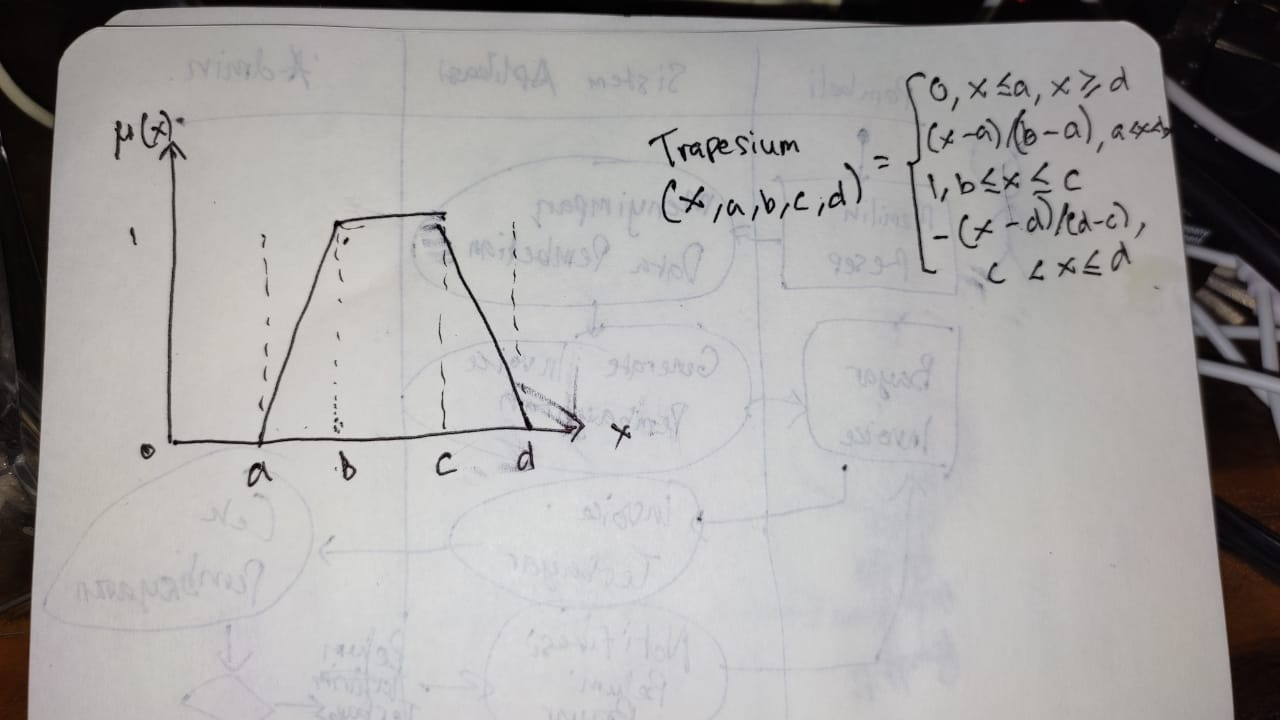

In [6]:
# mencari nilai x

def ruanganAB(a, b, x):
  _a = x - a
  _b = b - a
  return _a / _b


def ruanganCD(c, d, x):
  _c = -(x - d)
  _d = d - c
  return _c / _d

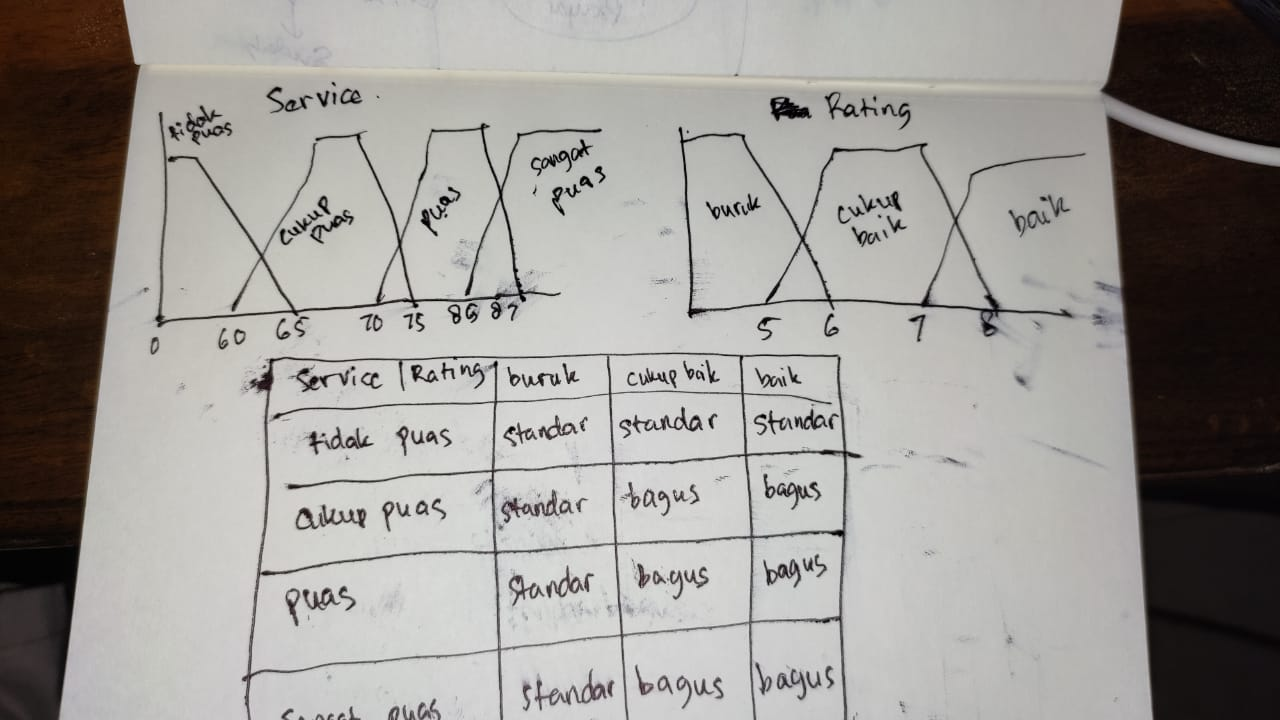

In [7]:
data = {'Buruk'     : [
                        'Standar','Standar','Standar','Standar'
                      ], 
        'Cukup Baik': [
                       'Standar','Bagus','Bagus','Bagus'
                      ],
        'Baik'      : [
                       'Standar','Bagus','Bagus','Bagus'
                      ]
        }  
  
fuzzyRule = pd.DataFrame(data, index = ['Tidak Puas', 'Cukup Puas', 'Puas', 'Sangat Puas'])  

In [8]:
fuzzyRule

,Buruk,Cukup Baik,Baik
Tidak Puas,Standar,Standar,Standar
Cukup Puas,Standar,Bagus,Bagus
Puas,Standar,Bagus,Bagus
Sangat Puas,Standar,Bagus,Bagus


In [9]:
def kombinasiData(goodService, rating):
  list = []
  # kombinasi
  for i in range(len(goodService)):
    for j in range(len(rating)):
      if rating[j][1] > goodService[i][1]:
        list.append([goodService[i][1],fuzzyRule[rating[j][0]][goodService[i][0]]]) # fuzzyRule
      else:
        list.append([rating[j][1], fuzzyRule[rating[j][0]][goodService[i][0]]])
  return list

In [10]:

def fuzzyfikasi(service, rating):

  if service < 60:
    dataService = [['Tidak Puas', 1.0]]
  elif service >= 60 and service <= 65:
    dataService = [['Tidak Puas', ruanganCD(60, 65, service)], ['Cukup Puas', ruanganAB(60, 65, service)]]
  elif service > 65 and service < 70:
    dataService = [['Cukup Puas', 1.0]]
  elif service >= 70 and service <= 75:
    dataService = [['Cukup Puas', ruanganCD(70, 75, service)], ['Puas', ruanganAB(70, 75, service)]]
  elif service > 75 and service < 85:
    dataService = [['Puas', 1.0]]
  elif service >= 85 and service <= 87:
    dataService = [['Puas', ruanganCD(85, 87, service)], ['Sangat Puas', ruanganAB(85, 87, service)]]
  elif service > 87:
    dataService = [['Sangat Puas', 1.0]]

  if rating < 5:
    dataRating = [['Buruk', 1.0]]
  elif rating >= 5 and rating <= 6:
    dataRating = [['Buruk', ruanganCD(5, 6, rating)], ['Cukup Baik', ruanganAB(5, 6, rating)]]
  elif rating > 6 and rating < 7:
    dataRating = [['Cukup Baik', 1.0]]
  elif rating >=  7 and rating <= 8:
    dataRating = [['Cukup Baik', ruanganCD(7, 8, rating)], ['Baik', ruanganAB(7, 8, rating)]]
  elif rating > 8:
    dataRating = [['Baik', 1.0]]
  
  return dataService, dataRating

In [11]:
def inference(goodService, rating):
  listData = kombinasiData(goodService, rating)

  
  sama = True
  cek = listData[0][1]
  for i in range(1,len(listData)):
    if cek != listData[0][1]:
      sama = False
  
  if sama == True:
    listData.sort(reverse=True)
    if listData[0][1] == 'Bagus':
      return 0.0, listData[0][0] # standar, bagus
    else:
      return listData[0][0], 0.0 # standar, bagus
  else:
    nilaiStandar = 0
    nilaiBagus = 0

    for i in range(len(listData)):
      if listData[i][1] == 'Standar' and listData[i][0] > nilaiStandar:
        nilaiStandar = listData[i][0]
      elif listData[i][1] == 'Bagus' and listData[i][0] > nilaiBagus:
        nilaiBagus = listData[i][0]

    return nilaiStandar,nilaiBagus
  

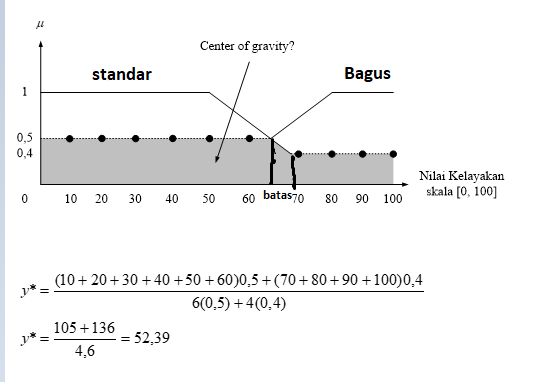

In [12]:
# -y(d-c)+d=x

def defuzzification(nilaiStandar, nilaiBagus):
  batasStandar = -nilaiStandar * (80 - 50) + 80
  batasBagus = -nilaiBagus * (80 - 50) + 80

  sumStandar = []
  sumBagus = []

  for i in range(1,int(batasStandar)):
    sumStandar.append(i-0.5)
    sumStandar.append(i)

  i = 100
  while i > batasBagus:
    sumBagus.append(i-0.5)
    sumBagus.append(i)
    i-=1
  
  hasil = (sum(sumStandar)*nilaiStandar + sum(sumBagus)*nilaiBagus)/(len(sumStandar)*nilaiStandar + len(sumBagus)*nilaiBagus)

  return hasil

In [13]:
# Main Program

tempDataFuzzy = []

for i in range(len(df)):
  service = df['service'][i].copy()
  rating = df['bintang'][i].copy()
  service, rating = fuzzyfikasi(service, rating)
  service, rating = inference(service, rating)
  tempDataFuzzy.append(defuzzification(service, rating))


In [14]:
df['fuzzy'] = tempDataFuzzy

In [15]:
df

,ID,service,bintang,fuzzy
0,1,41,2,24.75
1,2,51,9,24.75
2,3,36,1,24.75
3,4,28,10,24.75
4,5,90,5,24.75
...,...,...,...,...
95,96,66,3,24.75
96,97,68,1,24.75
97,98,58,5,24.75
98,99,22,8,24.75


In [16]:
df.sort_values(by=['fuzzy', 'service', 'bintang'], ascending = False, inplace = True)

In [17]:
df = df.reset_index(drop=True)

In [18]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df

,ID,service,bintang,fuzzy
0,46,63,8,81.25
1,15,74,7,78.25
2,16,74,7,78.25
3,33,95,9,75.25
4,79,95,6,75.25
5,59,93,6,75.25
6,68,91,10,75.25
7,45,90,7,75.25
8,32,87,10,75.25
9,76,87,10,75.25


In [19]:
id_hotel_terbaik = [id for id in df['ID'][:10]] # 10 hotel terbaik
id_hotel_terbaik

[46, 15, 16, 33, 79, 59, 68, 45, 32, 76]